*Unit 1, Sprint 1, Module 3*

---



# Join and Reshape Data 

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

# [Objective 1](#concat) - Concatenate dataframes with pandas
* Stacking sets of rows like LEGOs



# [Objective 2](#merge) - Merge dataframes with Pandas
* Bringing columns together by linking on a variable.

* Similar to SQL there are four types of merges or joins.  We'll focus on the inner join today.


#### The following code changes the built-in display () function to output dataframes as a row. 

In [1]:

import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### A Simple Example to Start

In [2]:
df0 = pd.DataFrame({'employee': ['Bob', 'Tanya', 'Jin', 'Harlan'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1 = pd.DataFrame({'employee': ['Jose', 'Paula'],
                    'group': ['Accounting', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Harlan', 'Bob', 'Jin', 'Tanya', 'Connie'],
                    'hire_date': [2004, 2008, 2012, 2014, 2015]})

print((pd.concat([df0, df1], ignore_index=True)))

  employee        group
0      Bob   Accounting
1    Tanya  Engineering
2      Jin  Engineering
3   Harlan           HR
4     Jose   Accounting
5    Paula  Engineering


In [3]:
display('df0', 'df1', 'df2')

df0
  employee        group
0      Bob   Accounting
1    Tanya  Engineering
2      Jin  Engineering
3   Harlan           HR

df1
  employee        group
0     Jose   Accounting
1    Paula  Engineering

df2
  employee  hire_date
0   Harlan       2004
1      Bob       2008
2      Jin       2012
3    Tanya       2014
4   Connie       2015

In [4]:
print( pd.merge(df0, df2) ); print() #IGNORES EVERYTHING NOT PRESENT IN BOTH
# this is because the argument how='inner' is default

print( pd.merge(df0, df2, how='outer') ); print() 

  employee        group  hire_date
0      Bob   Accounting       2008
1    Tanya  Engineering       2014
2      Jin  Engineering       2012
3   Harlan           HR       2004

  employee        group  hire_date
0      Bob   Accounting       2008
1    Tanya  Engineering       2014
2      Jin  Engineering       2012
3   Harlan           HR       2004
4   Connie          NaN       2015



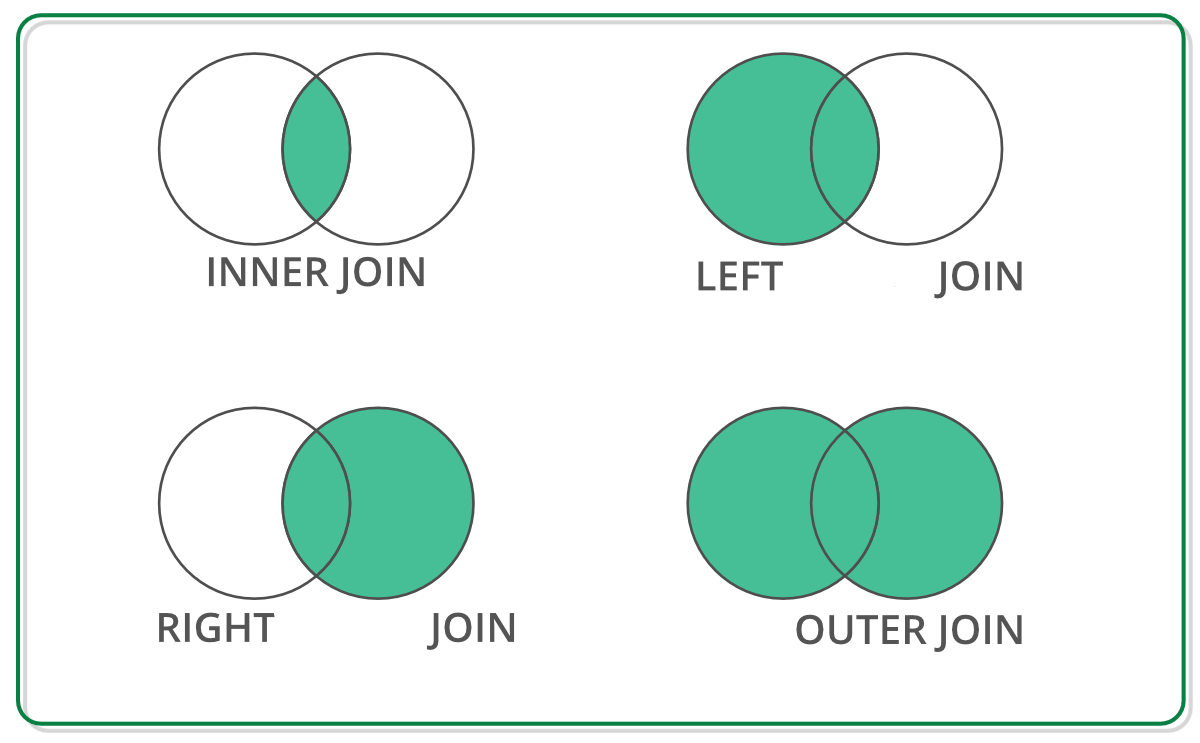

## Follow Along



We’ll work with a subset of the dataset [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!




### The first thing we need to do is take a look at each CSV so we can figure out how they relate to each other.

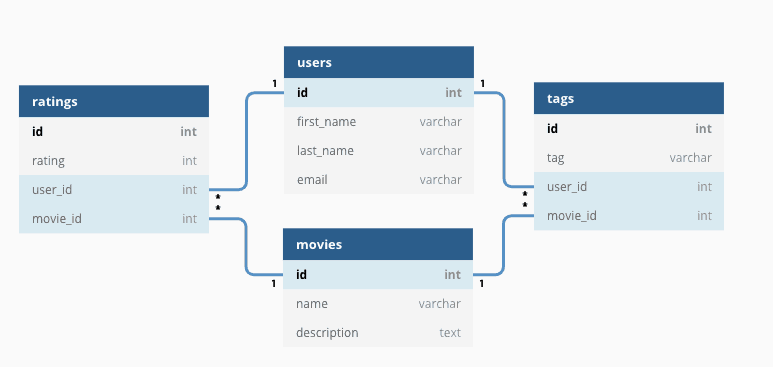

###Let's take a look at each CSV

### order_products__prior


In [5]:
import pandas as pd

opp_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_prior_sm.csv'

order_products__prior = pd.read_csv(opp_url)

print(order_products__prior.shape)
order_products__prior.head()

(25000, 4)


order_id  product_id  add_to_cart_order  reordered
0   1696715       34969                 11          0
1   2077308       16641                 16          0
2    303457       46881                  6          0
3    514151       31766                  9          0
4   2099209        7908                 10          1

### order_products__train




In [6]:
opt_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_train_sm.csv'

order_products__train = pd.read_csv(opt_url)

print(order_products__train.shape)
order_products__train.head()

(25000, 4)


order_id  product_id  add_to_cart_order  reordered
0   3178234       22620                  2          0
1   2319083       27156                 14          0
2   1951854        5818                  9          1
3   1615787       40198                 13          0
4   1666094       14491                 13          0

Order-prducts:


### orders


In [7]:
orders_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/orders_sm.csv'

orders = pd.read_csv(orders_url)

print(orders.shape)
orders.head()

(25000, 7)


order_id  user_id  ... order_hour_of_day  days_since_prior_order
0    209450     4647  ...                16                     8.0
1   2381956   117152  ...                12                    15.0
2   2294641   123531  ...                13                    14.0
3   2674353   167358  ...                11                     8.0
4   1776425    14814  ...                19                     4.0

[5 rows x 7 columns]

orders:



### products


In [8]:
products_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/product_names_sm.csv'

products = pd.read_csv(products_url)

print(products.shape)
products.head()

(25000, 4)


product_id  ... department_id
0       45676  ...            11
1       35408  ...            16
2       37442  ...            16
3       41599  ...            11
4       21994  ...            11

[5 rows x 4 columns]

products:



## Concatenate order_products__prior and order_products__train




In [9]:
#Concatenate _prior and _train datasets.

order_products = pd.concat([order_products__prior, order_products__train], ignore_index = True)
print(order_products); print()

       order_id  product_id  add_to_cart_order  reordered
0       1696715       34969                 11          0
1       2077308       16641                 16          0
2        303457       46881                  6          0
3        514151       31766                  9          0
4       2099209        7908                 10          1
...         ...         ...                ...        ...
49995   1474983       21903                 21          0
49996    891325       26209                  5          1
49997    151280       13176                  6          1
49998   3250616       47719                  4          0
49999   2733689       17435                 19          0

[50000 rows x 4 columns]



## Overview

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that thestore offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart. 

### The Orders Dataframe

Holds information about specific orders, things like who/what placed the order.

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

#Let's merge all the datasets together.

We want to form a single dataset that contains the following columns:

user id	

order id	

order number	

order dow	

order hour of day	

add to cart order	

product id	product name



### First Merge

1) Combine `orders` and `order_products`

2) We will use the _________ column to match information between the two datasets


In [10]:
display('order_products', 'orders')

order_products
       order_id  product_id  add_to_cart_order  reordered
0       1696715       34969                 11          0
1       2077308       16641                 16          0
2        303457       46881                  6          0
3        514151       31766                  9          0
4       2099209        7908                 10          1
...         ...         ...                ...        ...
49995   1474983       21903                 21          0
49996    891325       26209                  5          1
49997    151280       13176                  6          1
49998   3250616       47719                  4          0
49999   2733689       17435                 19          0

[50000 rows x 4 columns]

orders
       order_id  user_id  ... order_hour_of_day  days_since_prior_order
0        209450     4647  ...                16                     8.0
1       2381956   117152  ...                12                    15.0
2       2294641   123531  ...                13                    14.0
3       2674353   167358  ...                11                     8.0
4       1776425    14814  ...                19                     4.0
...         ...      ...  ...               ...                     ...
24995   1907583    52553  ...                14                    16.0
24996   2030640     6573  ...                 8                     7.0
24997   2833651   134377  ...                12                     6.0
24998   3069074   157142  ...                12                    13.0
24999   1654856    30884  ...                17                     2.0

[25000 rows x 7 columns]

In [11]:
print(set(order_products.columns));print()
print(set(orders.columns));print()

print( set(order_products.columns) & set(orders.columns) )

#This means we want to use order_id col to match information

{'add_to_cart_order', 'order_id', 'product_id', 'reordered'}

{'order_dow', 'order_id', 'user_id', 'order_number', 'days_since_prior_order', 'eval_set', 'order_hour_of_day'}

{'order_id'}


In [12]:
orders_and_products = pd.merge(orders.copy(), order_products)
orders_and_products

order_id  user_id eval_set  ...  product_id  add_to_cart_order  reordered
0     3160964   117859    train  ...       14325                  6          1
1     3266748    27911    train  ...       10467                  3          0
2     2979309    59923    prior  ...       48527                  5          1
3     3392084    47372    prior  ...        6481                  2          1
4     1294006    13729    train  ...        8518                 23          0
..        ...      ...      ...  ...         ...                ...        ...
352   2175188    43836    prior  ...       35903                 31          0
353    601014    99389    prior  ...       43483                 18          0
354   3039464    99209    train  ...       10199                  2          1
355    107837    18105    prior  ...       14633                  2          1
356   2771817   197485    train  ...       10749                 24          1

[357 rows x 10 columns]

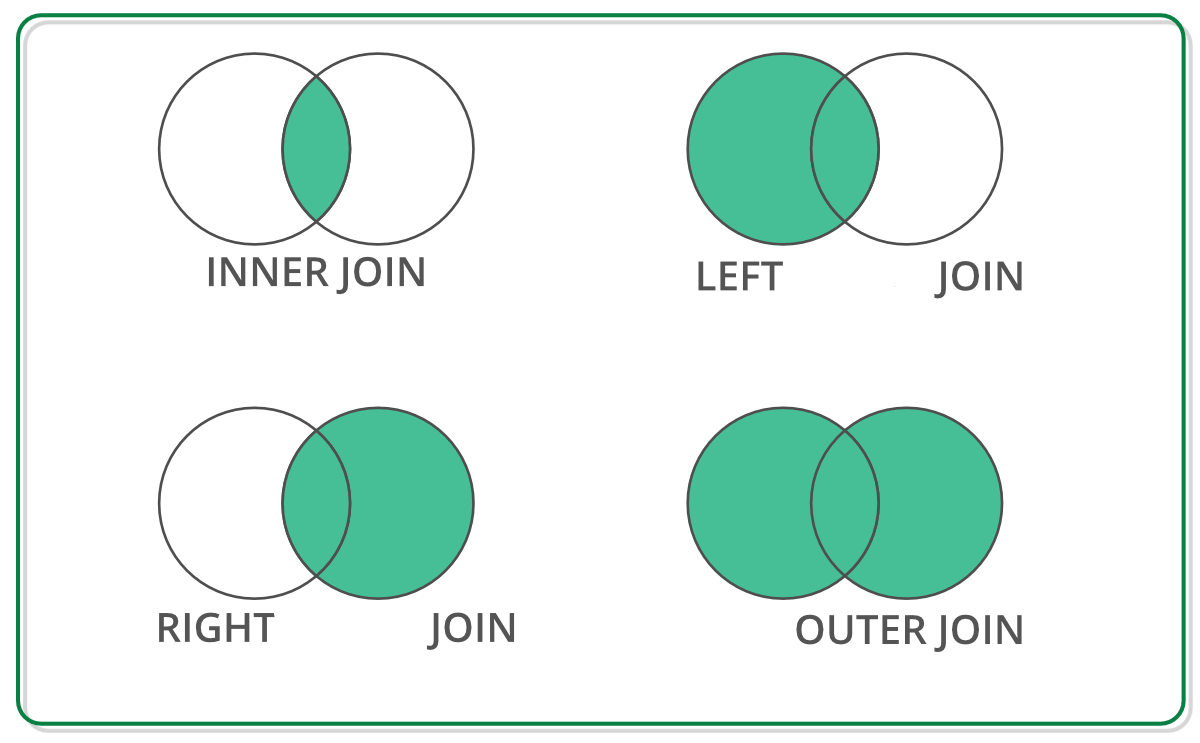

Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time:

1) Merge `orders_and_products` with `products`

2) Use ___________ as our identifier in both tables


In [13]:
set(products.columns) & set(orders_and_products.columns)

{'product_id'}

In [14]:
#The pd merge method is taught in cavas
# The more common method is to specify merge AFTER (as a method of the dataframe object)
# There is a slight change in syntax

#Pandas.merge is being deprecated, dataframe.merge is preferred

print( orders_and_products.copy().merge(products) ) #, on='product_id') #product_id is autodetected?


     order_id  user_id  ... aisle_id  department_id
0     2979309    59923  ...       24              4
1     3392084    47372  ...       91             16
2     1294006    13729  ...       83              4
3      733540    73072  ...       83              4
4     2857970    94375  ...       83              4
..        ...      ...  ...      ...            ...
180   1629522    49582  ...      128              3
181   2175188    43836  ...       79              1
182    601014    99389  ...        4              9
183    107837    18105  ...      107             19
184   2771817   197485  ...       83              4

[185 rows x 13 columns]


In [18]:
#Suppose you don't want to join everything from products
final = orders_and_products.merge(products[ ['product_id', 'product_name'] ])
final

order_id  ...                                    product_name
0     2979309  ...                                         Avocado
1     3392084  ...                   Vanilla Almond Coffee Creamer
2     1294006  ...                               Organic Red Onion
3      733540  ...                               Organic Red Onion
4     2857970  ...                               Organic Red Onion
..        ...  ...                                             ...
180   1629522  ...                  Original Light Flatbread Wraps
181   2175188  ...             Gluten Free Garden Margherita Pizza
182    601014  ...  Souper 6-Pack Chicken Flavor Ramen Noodle Soup
183    107837  ...                                    Veggie Chips
184   2771817  ...                         Organic Red Bell Pepper

[185 rows x 11 columns]

### Some nitpicky cleanup:

In [21]:
final = final[ ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name'] ]
final

user_id  ...                                    product_name
0      59923  ...                                         Avocado
1      47372  ...                   Vanilla Almond Coffee Creamer
2      13729  ...                               Organic Red Onion
3      73072  ...                               Organic Red Onion
4      94375  ...                               Organic Red Onion
..       ...  ...                                             ...
180    49582  ...                  Original Light Flatbread Wraps
181    43836  ...             Gluten Free Garden Margherita Pizza
182    99389  ...  Souper 6-Pack Chicken Flavor Ramen Noodle Soup
183    18105  ...                                    Veggie Chips
184   197485  ...                         Organic Red Bell Pepper

[185 rows x 8 columns]

#Let's answer some questions using this dataset.

How many unique users are represented here?

In [23]:
final['user_id'].nunique()

173

How many users ordered only once vs. more than one time?

In [27]:
final['user_id'].value_counts().value_counts()

1    163
2      9
4      1
Name: user_id, dtype: int64

At what time were most orders placed?

In [32]:
final['order_hour_of_day'].value_counts().sort_values(ascending=False)

15    20
8     17
17    17
16    17
13    15
12    14
11    13
9     13
18    12
10    11
14    10
7      6
20     5
22     5
19     3
23     2
21     2
5      1
6      1
4      1
Name: order_hour_of_day, dtype: int64

And on what day of the week?

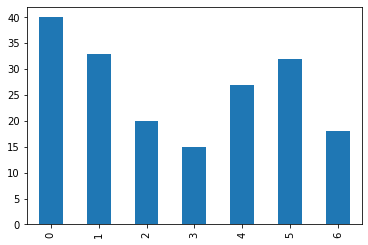

In [34]:
final['order_dow'].value_counts().sort_index().plot(kind='bar')

What was the most commonly ordered product?

In [35]:
final['product_name'].value_counts()

Bag of Organic Bananas                 5
Organic Baby Spinach                   4
Organic Avocado                        4
Organic Lemon                          3
Organic Red Onion                      3
                                      ..
100% Recycled Paper Towels             1
Frosted Mini-Wheats Original Cereal    1
Organic Yams                           1
Cheese Pizza Snacks                    1
Organic Marinara Pasta Sauce           1
Name: product_name, Length: 157, dtype: int64

How many products were ordered more than once?

In [36]:
final['product_name'].value_counts().value_counts()

1    142
3      6
2      6
4      2
5      1
Name: product_name, dtype: int64

Let's create a subset of the products that were ordered multiple times and view the names of those products.



In [39]:
order_counts = final['product_name'].value_counts()

order_counts[order_counts>1]

Bag of Organic Bananas               5
Organic Baby Spinach                 4
Organic Avocado                      4
Organic Lemon                        3
Organic Red Onion                    3
Limes                                3
Organic Garnet Sweet Potato (Yam)    3
Organic Granny Smith Apple           3
Organic Blueberries                  3
Organic Zucchini                     2
Cultured Low Fat Buttermilk          2
Green Bell Pepper                    2
Organic Carrot Bunch                 2
Feta Cheese Crumbles                 2
Organic Blackberries                 2
Name: product_name, dtype: int64

How many times did people only order one thing?



In [41]:
order_counts[order_counts==1].sum()


142

What did they order when they only ordered one thing?

In [46]:
one_thing = order_counts[order_counts==1].index

In [50]:
final[ final['product_name'].isin(one_thing) ]

user_id  ...                                    product_name
0      59923  ...                                         Avocado
1      47372  ...                   Vanilla Almond Coffee Creamer
5     140326  ...                                     Black Beans
6      93888  ...                                    Baby Arugula
7     190561  ...                                  Taco Seasoning
..       ...  ...                                             ...
180    49582  ...                  Original Light Flatbread Wraps
181    43836  ...             Gluten Free Garden Margherita Pizza
182    99389  ...  Souper 6-Pack Chicken Flavor Ramen Noodle Soup
183    18105  ...                                    Veggie Chips
184   197485  ...                         Organic Red Bell Pepper

[142 rows x 8 columns]

At what time were single items ordered?

In [51]:
final[ final['product_name'].isin(one_thing) ]['order_hour_of_day']

0      14
1      16
5      16
6      21
7      12
       ..
180    14
181    14
182    12
183    16
184    11
Name: order_hour_of_day, Length: 142, dtype: int64

In [54]:
single_orders = final [final['product_name'].isin(one_thing)]

How about single orders placed on each day of the week?

In [55]:
single_orders['order_dow'].value_counts()

0    35
5    28
1    27
4    22
2    16
6     9
3     5
Name: order_dow, dtype: int64

## Group By 

In [56]:
data_url = 'https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/disneymarathon2020.csv'
disney = pd.read_csv(data_url)
disney.head()

gender  age  place    group  netTime     minutes        mph
0      M   30      1  M30-34   2:22:19  142.316667  11.053695
1      M   26      2  M25-29   2:27:02  147.033333  10.699105
2      M   32      3  M30-34   2:27:28  147.466667  10.667665
3      M   35      4  M35-39   2:39:20  159.350000   9.872137
4      M   26      5  M25-29   2:44:09  164.166667   9.582487

#### Answer Questions

What are the average times for male and female runners?

In [58]:
disney.groupby('gender')['minutes'].mean()

# If you just put disney.groupby('gender') then
# it won't know how to display that split of multiple dataframes

#Likewise if you just put disney.groupby('gender')['minutes'] then
# it won't know how to display that split of multiple series

gender
F    377.510519
M    347.949587
Name: minutes, dtype: float64

What is the average age for male and female runners? 

In [59]:
disney.groupby('gender')['age'].mean()

gender
F    38.508965
M    41.592976
Name: age, dtype: float64

For each group, what was the fastest time recorded?

In [60]:
disney.groupby('gender')['minutes'].min()

gender
F    174.316667
M    142.316667
Name: minutes, dtype: float64

### Practice 

In [17]:
orders= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Orders.csv', header=1)
people= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/People.csv', header= 1, usecols = [0, 1])
returns= pd.read_csv("https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Returns.csv", header=1, usecols = [0, 1])



Merge the orders and the people datasets. 

Merge your newly created dataframe to the returns dataframe. We only want to study returns.
*Hint:* The final shape of your dataframe should be (3226, 23).

How many orders, broken down by Segment, were returned?

What was the most expensive product returned?

What customer was responsible for the most returns?

What customer was responsible for the most expensive return? 

# [Objective 3](#tidy) - Learn Tidy Data Format

In tidy data format, every row contains a record of a single observation and each column contains a unique measurement.

One way to check if you have tidy data is to ask: If all the rows of your dataset contain the same types of information.  If yes, then you have tidy data.

Tidy data in much more detail: https://vita.had.co.nz/papers/tidy-data.pdf

